In [273]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import os

In [274]:
def image_data(dir,image_width=128,image_height=128):
    images, labels = [], []
    class_names = sorted(os.listdir(dir))

    for label in class_names:
        label_dir = os.path.join(dir,label)
        for img_dir in os.listdir(label_dir):
            image_path = os.path.join(label_dir,img_dir)
            image = load_img(image_path,target_size=(image_height,image_width))
            image = img_to_array(image)
            images.append(image)
            labels.append(class_names.index(label))

    images = np.array(images)/255.0
    labels = np.array(labels)

    return images, labels, class_names


In [275]:
def split_data(images,labels):
    return train_test_split(images,labels,test_size=0.2,random_state=42)

In [276]:
def visualize_samples(images,labels,class_names,num_samples=10):
    plt.figure(figsize=(12,5))
    for i in range(num_samples):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.title(f'Label: {class_names[labels[i]]}')
        plt.axis('off')

    plt.show()

In [277]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), activation='relu',),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [278]:
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,          # Apply shearing to add slight distortions
    zoom_range=0.2,           # Randomly zoom in/out within 20% of the image size
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest',      # Fill any empty pixels that result from transformations
    brightness_range=[0.8, 1.2]  # Randomly adjust brightness between 80% and 120%
)

In [279]:
def train_model(model,train_images,train_labels,test_images,test_labels,batch_size=32,epochs=10):
    history = model.fit(
        data_augmentation.flow(train_images,train_labels,batch_size=batch_size),
        validation_data = (test_images,test_labels),
        epochs = epochs
    )

    return history

In [280]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'],label='Test loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [281]:
def evaluate_model(model,test_imgs,test_labels):
    test_loss,test_acc = model.evaluate(test_imgs,test_labels)
    print(f'Test accuracy is: ',test_acc)
    print(f'Test loss: ',test_loss)

In [282]:
def plot_confusion_matrix(model,test_images,test_labels,class_names):
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions,axis=1)
    cm = confusion_matrix(test_labels,predicted_classes)
    sns.heatmap(cm,annot=True,cmap='Blues')
    plt.show()

In [283]:
img_dir = "/Users/aditirajesh/Downloads/Mid-model Exam/horse-or-human/horse-or-human/"
img_height, img_width = 128,128

images, labels, class_names = image_data(img_dir,img_width,img_height)
train_images,test_images,train_labels,test_labels= split_data(images,labels)



/Users/aditirajesh/Downloads/Mid-model Exam/horse-or-human/horse-or-human/horses
Class names found: ['horses', 'humans']
Loading images from: horse43-5.png
Loading images from: horse06-5.png
Loading images from: horse20-6.png
Loading images from: horse04-7.png
Loading images from: horse41-7.png
Loading images from: horse22-4.png
Loading images from: horse19-2.png
Loading images from: horse24-2.png
Loading images from: horse37-8.png
Loading images from: horse02-1.png
Loading images from: horse47-1.png
Loading images from: horse39-7.png
Loading images from: horse26-0.png
Loading images from: horse13-9.png
Loading images from: horse45-3.png
Loading images from: horse45-2.png
Loading images from: horse13-8.png
Loading images from: horse26-1.png
Loading images from: horse39-6.png
Loading images from: horse02-0.png
Loading images from: horse37-9.png
Loading images from: horse47-0.png
Loading images from: horse24-3.png
Loading images from: horse19-3.png
Loading images from: horse22-5.png
Load

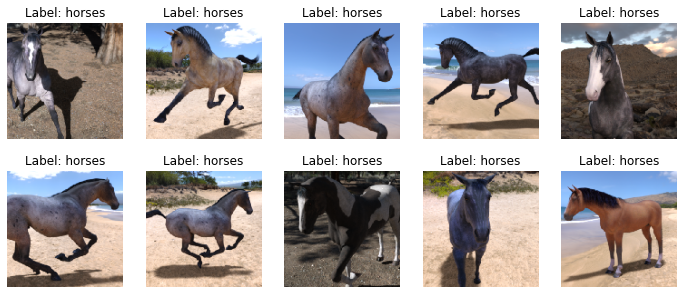

In [284]:
visualize_samples(images,labels,class_names)

In [285]:
model = create_model()
history = train_model(model,train_images,train_labels,test_images,test_labels)

Epoch 1/10
26/26 [==============================] - 13s 438ms/step - loss: 0.6948 - accuracy: 0.5225 - val_loss: 0.6711 - val_accuracy: 0.6408
Epoch 2/10
26/26 [==============================] - 13s 492ms/step - loss: 0.6800 - accuracy: 0.5542 - val_loss: 0.6773 - val_accuracy: 0.5340
Epoch 3/10
26/26 [==============================] - 13s 496ms/step - loss: 0.6567 - accuracy: 0.5676 - val_loss: 2.2588 - val_accuracy: 0.5000
Epoch 4/10
26/26 [==============================] - 12s 457ms/step - loss: 0.6554 - accuracy: 0.5603 - val_loss: 0.9768 - val_accuracy: 0.4951
Epoch 5/10
26/26 [==============================] - 11s 437ms/step - loss: 0.6370 - accuracy: 0.5847 - val_loss: 2.8190 - val_accuracy: 0.4757
Epoch 6/10
26/26 [==============================] - 14s 522ms/step - loss: 0.6382 - accuracy: 0.5834 - val_loss: 1.3538 - val_accuracy: 0.4757
Epoch 7/10
26/26 [==============================] - 13s 508ms/step - loss: 0.6412 - accuracy: 0.5676 - val_loss: 0.9910 - val_accuracy: 0.4369

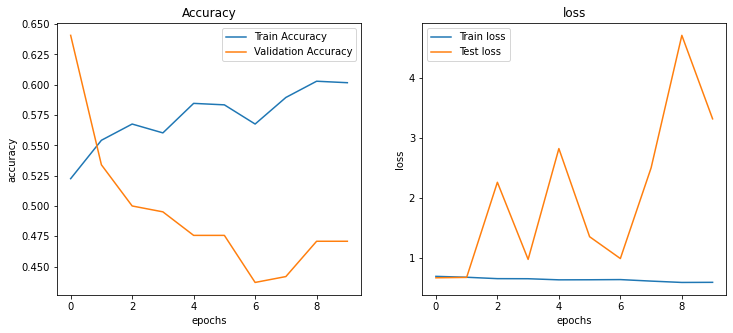

In [286]:
plot_loss_accuracy(history)

In [287]:
evaluate_model(model,test_images,test_labels)

7/7 [==============================] - 1s 119ms/step - loss: 3.3134 - accuracy: 0.4709
Test accuracy is:  0.47087377309799194
Test loss:  3.313434600830078


7/7 [==============================] - 1s 101ms/step


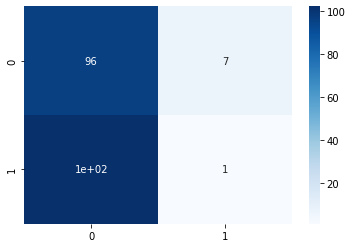

In [288]:
plot_confusion_matrix(model,test_images,test_labels,class_names)